---

__Author name__: UBAIDULLAH

[GitHub Profile](https://github.com/ubaid-X/)

[LinkedIn Profile](https://https://www.linkedin.com/in/ubaid-ullah-634563373/)

[Kaggle Profile](https://www.kaggle.com/ubaidullah01)

__Email__: `ai.bussiness.student0@gmail.com`

---

> # Day-10 mastering pandas and EDA (Part-3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_titanic= pd.read_excel("../5_Datasets/titanic_ex.xlsx")
df_titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


# find  missing values/null values/NaNs

In [10]:
len(df_titanic) #number of total rows or number of total values in a column

891

In [2]:
# finding null values
df_titanic.isnull().sum()  # count missing values

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# finding null values percentage
df_titanic.isnull().sum() / len(df_titanic) * 100 # percentage of missing values in a column

Unnamed: 0      0.000000
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

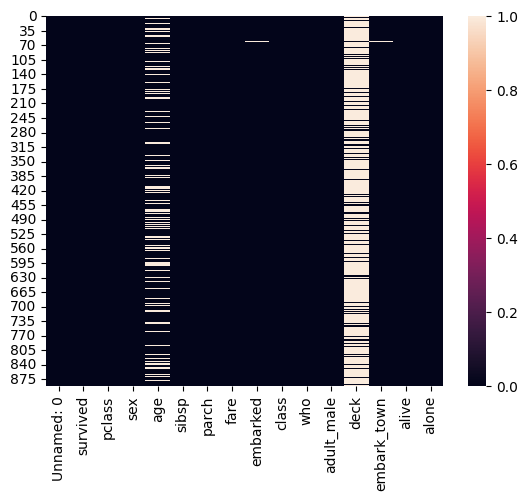

In [ ]:
# another way for count missing values
sns.heatmap(df_titanic.isnull())

<Axes: >

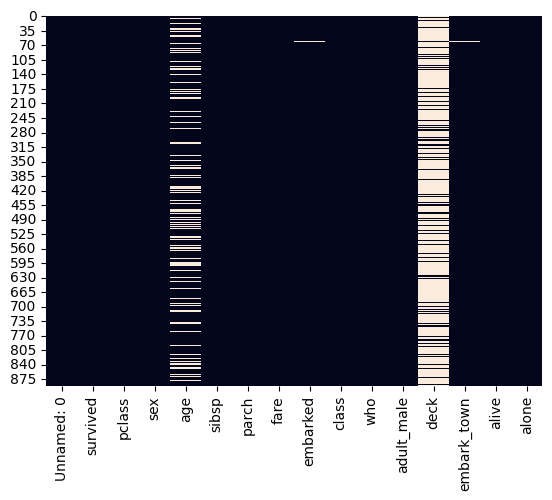

In [12]:
# if you want to remove color bar than
sns.heatmap(df_titanic.isnull(), cbar=False)

In [14]:
df_titanic['sex'] # to select one column by name

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [ ]:
df_titanic[['sex', 'age']] # to select two by name

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [19]:
df_titanic[['sex', 'age', 'embark_town']] # to select multiple column by name


,sex,age,embark_town
0,male,22.0,Southampton
1,female,38.0,Cherbourg
2,female,26.0,Southampton
3,female,35.0,Southampton
4,male,35.0,Southampton
...,...,...,...
886,male,27.0,Southampton
887,female,19.0,Southampton
888,female,NaN,Southampton
889,male,26.0,Cherbourg


- ### __finding unique values__

In [ ]:
df_titanic['sex'].unique()   # unique values in a column

array(['male', 'female'], dtype=object)

In [ ]:
df_titanic.sex.nunique() #number of unique values in a column

2

In [ ]:
# GIVING number of unique values of all column
df_titanic.nunique() 

Unnamed: 0     891
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [ ]:
# print columnS name
df_titanic.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
#value count
# how many people are in titanic of different places
df_titanic['embark_town'].value_counts()


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

# Basic Summery

In [25]:
# summery
df_titanic.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df_titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


>  syntax => .groupby( base on that/independent )[ find that/dependent ]

In [ ]:
# finding mean fare/rent of both male and female using groupby function

df_titanic.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [28]:
# mean fare base on class
df_titanic.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [29]:
# mean fare of survived and unservived
df_titanic.groupby('survived')['fare'].mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

In [34]:
# group by two column
df_titanic.groupby(['survived', 'who']).size()

survived  who  
0         child     34
          man      449
          woman     66
1         child     49
          man       88
          woman    205
dtype: int64

> # Correlation matrix
> syntax: `df.corr()`

In [6]:
# correlation_df = df_titanic.select_dtypes(include='number').corr()
correlation_df = df_titanic[['fare', 'age', 'sibsp', 'parch']].corr()

<Axes: >

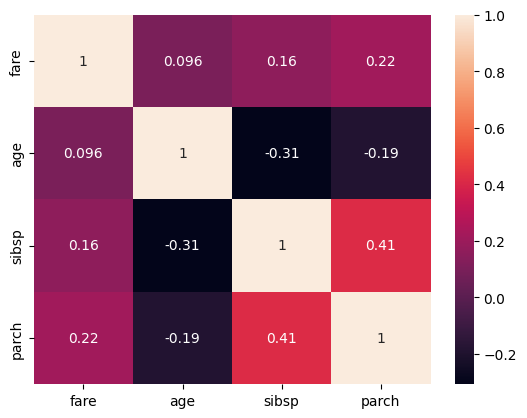

In [10]:
sns.heatmap(correlation_df, annot=True)

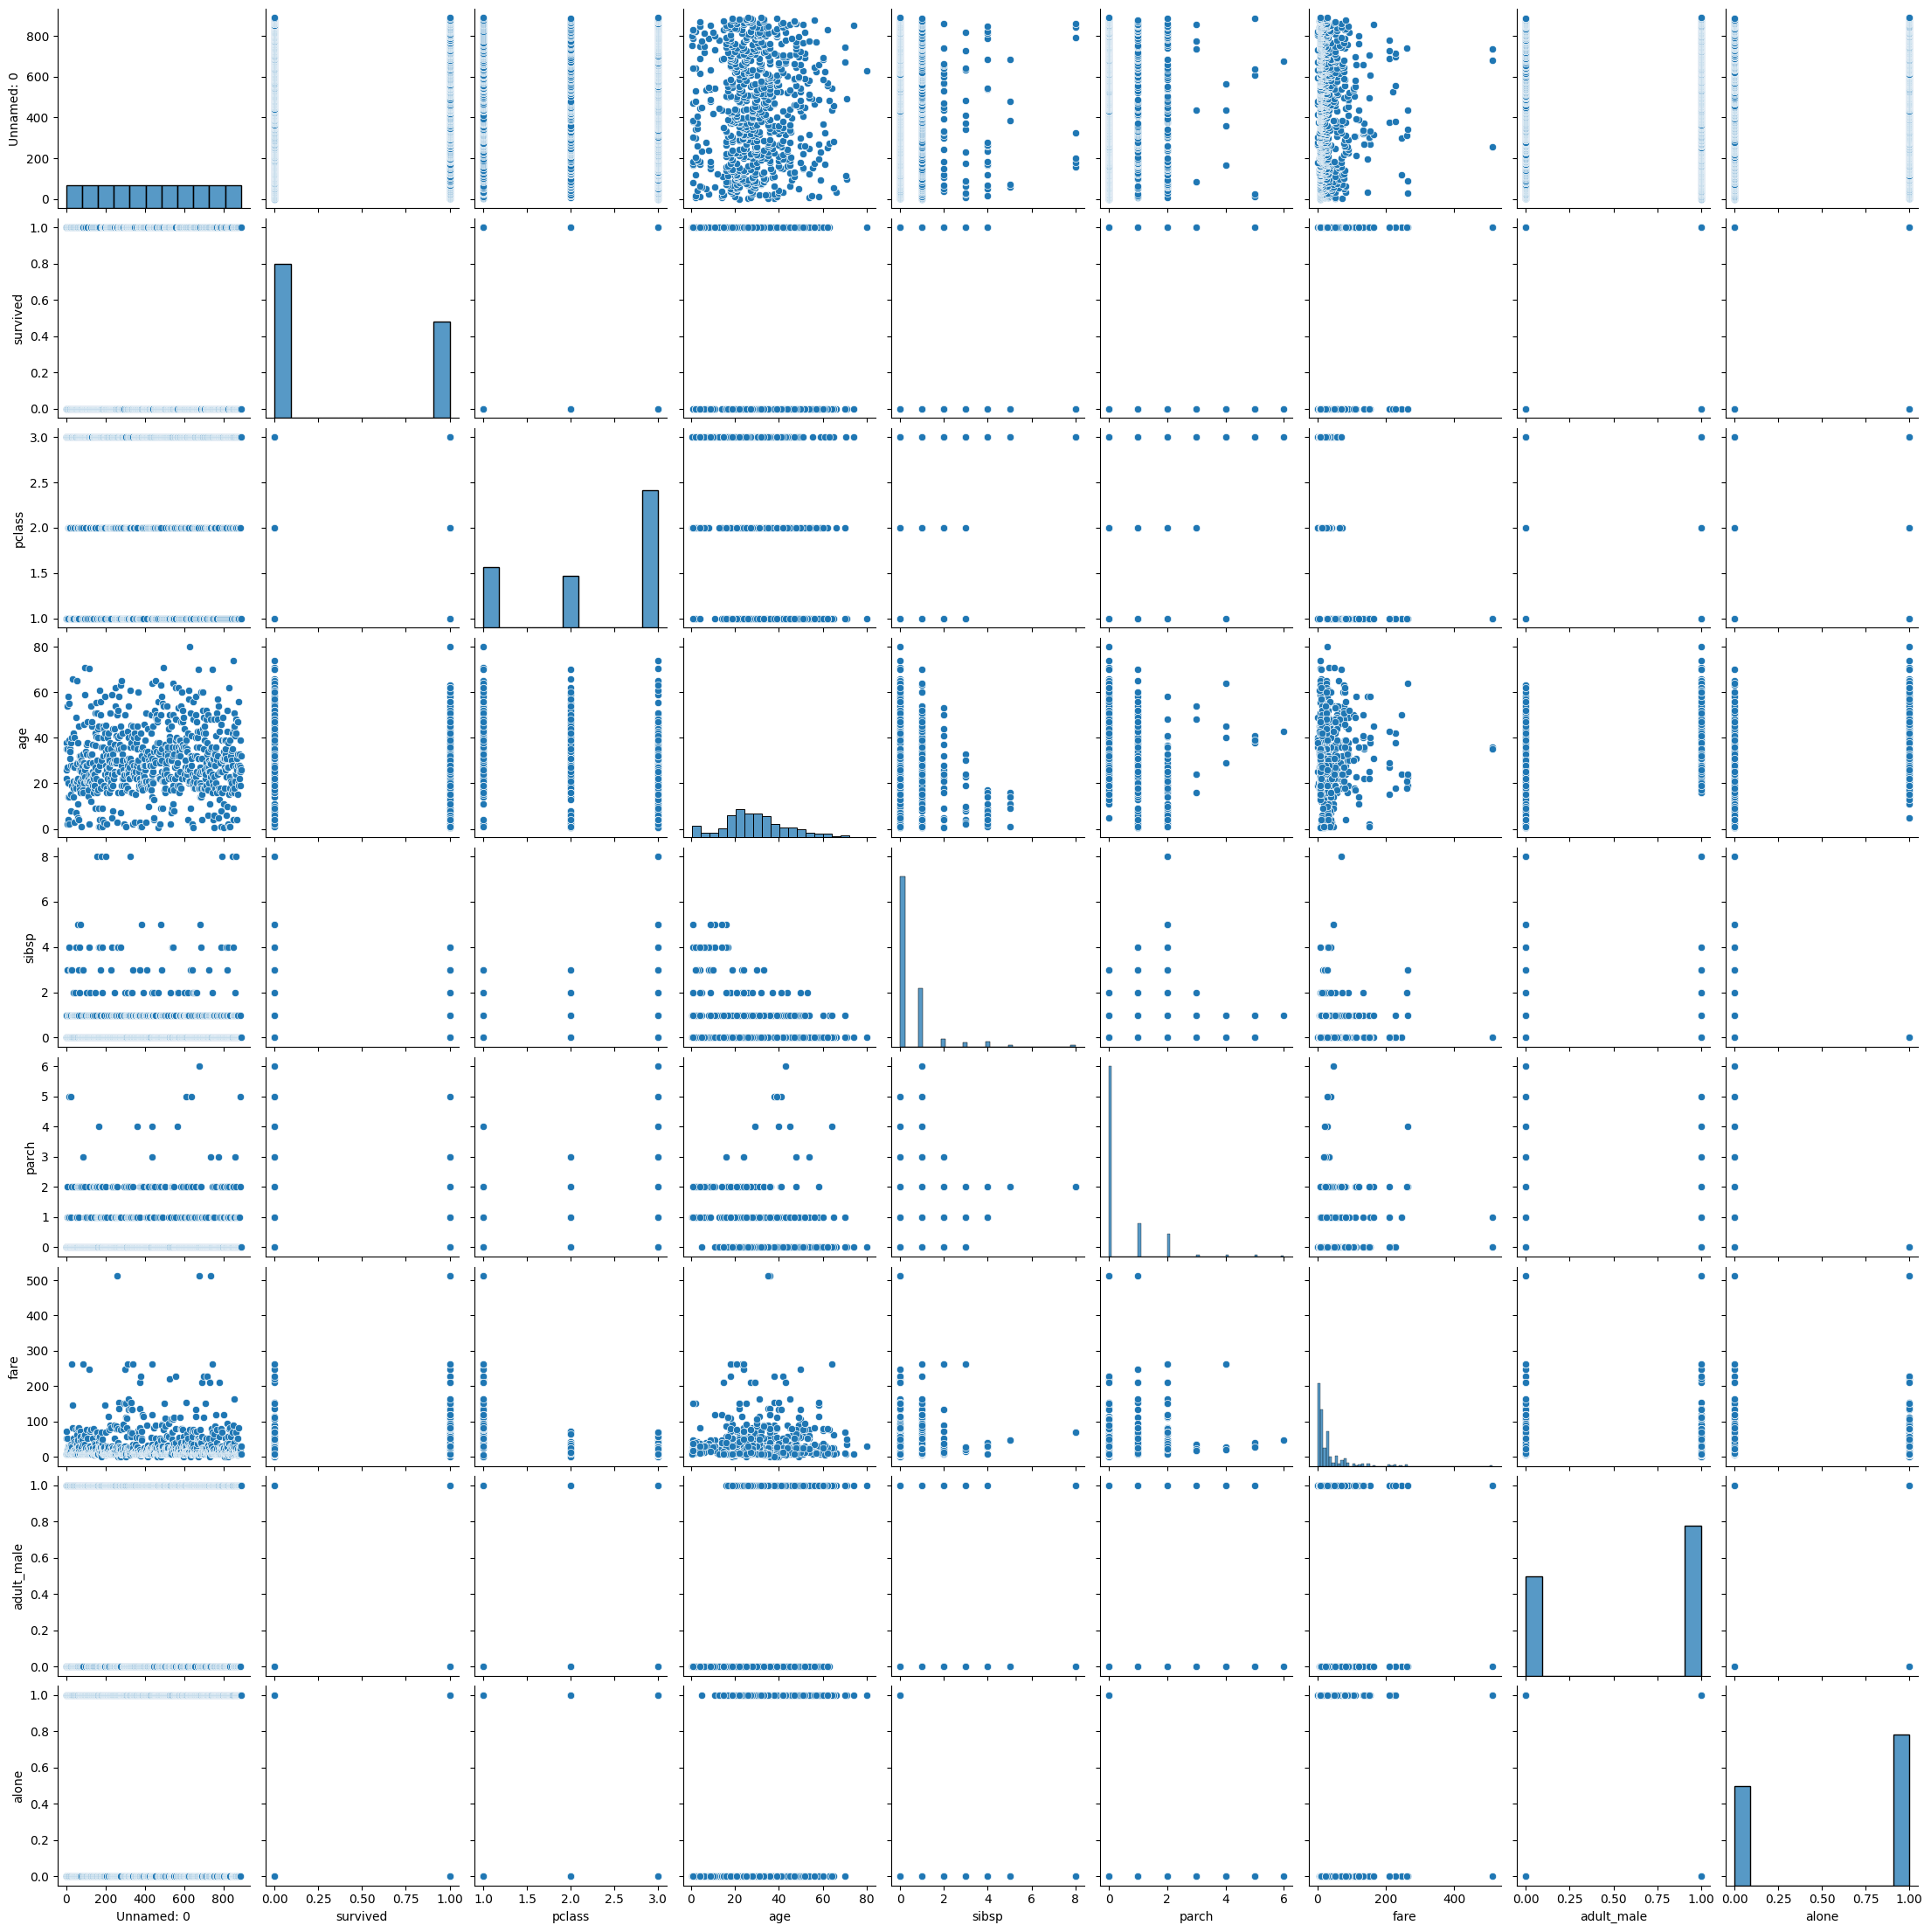

In [42]:
sns.pairplot(df_titanic)

> # STARTING EDA

> ## DATA
- Feel data
  - undestand everything about the data 
- example:
  - kon hai?
  - kis khanadan si hai?
  - kaha padhtha hai?
  - kya bussiness kartha hai?
  - status kya hai wageraa...?

1- Explore who collected/gattered this data

2- what is this data about?

3- find Metadata of the data
  - motive of column names and values
  - example of titanic:
    - | sibps | parch | survived |

4- Data ki Dimention =>  `info()`
  - dimention: rows * column

> ### Imp Knowing about data:
1- <span style='color:blue'>Composition of Data</span>:
  - Data kis thariqi si bana hai + `info`()?

2- <span style='color:blue'>Correlation of Data</span>

-----------------> `-1---0---+1`

  - if value = 0: than no relation between them.

          |

          |

          |---------->

          |

          |_____________

  - if value = -1: than indirect relation => one increases than second will decreases.
          |

          |\

          | \

          |  \

          |   \

          |_____________

  - if value = +1: than directly relation => if one increases than second will decreases.

          | 
          |   /
          |  /
          | /
          |/____________
  - highly correlation: `+0.5 to +1.`
  - highly Negative correlation: `-0.5 to -1`

3- <span style='color:blue'>Comparison of Data: `groupby()`</span>

4- <span style='color:blue'>Distribution of Data:</span>

If you keep in mind this fourth things and do data analysis it will called __DESCRIPTIVE DATA ANALYTICS__ 

` we will doing Descriptive + Diagnosis data Analytics`

# DIAGONOSIS:
- missing values will done in Composition

# EDA
  - Data Exploration
  - Data Wrangling
  - Data Munging
  - Data Pre-Processing
  - Data Cleaning

![EDA_13](EDA_PIC/EDA_13.png)

